In [1]:
import pandas as pd
import umap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import os




### Embeddings STS pour dHCP pour un latent de taille 32

In [2]:
# Charger l'espace latent
embeddings_STS_dHCP = pd.read_csv('/neurospin/dico/data/deep_folding/current/models/Champollion_V1_after_ablation/STs_right/name08-32-58_52/dHCP_random_embeddings/full_embeddings.csv', index_col=0)
# Charger les labels
labels_dHCP = pd.read_csv('/neurospin/dico/data/deep_folding/current/datasets/dHCP_374_subjects/participants.csv')

print("Shape embeddings",embeddings_STS_dHCP.shape)
print("Shape labels", labels_dHCP.shape)

# Filtrer les lignes avec labels
embeddings_STS_dHCP= embeddings_STS_dHCP.loc[embeddings_STS_dHCP.index.isin(labels_dHCP['Subject'])]
# Fusionner les labels
embeddings_STS_dHCP = embeddings_STS_dHCP.join(labels_dHCP.set_index('Subject'))

print(embeddings_STS_dHCP.columns)

print("Shape embeddings",embeddings_STS_dHCP.shape)
print("Shape labels", labels_dHCP.shape)





Shape embeddings (374, 32)
Shape labels (374, 8)
Index(['dim1', 'dim2', 'dim3', 'dim4', 'dim5', 'dim6', 'dim7', 'dim8', 'dim9',
       'dim10', 'dim11', 'dim12', 'dim13', 'dim14', 'dim15', 'dim16', 'dim17',
       'dim18', 'dim19', 'dim20', 'dim21', 'dim22', 'dim23', 'dim24', 'dim25',
       'dim26', 'dim27', 'dim28', 'dim29', 'dim30', 'dim31', 'dim32',
       'session_id', 'birth_age', 'Preterm_28', 'Preterm_30', 'Preterm_32',
       'Preterm_34', 'Preterm_37'],
      dtype='object')
Shape embeddings (374, 39)
Shape labels (374, 8)


In [3]:
# Première UMAP
X_babies= embeddings_STS_dHCP.iloc[:,:32].values
Xs_babies = StandardScaler().fit_transform(X_babies)
umap_1 = umap.UMAP(n_components=2, random_state=42).fit_transform(Xs_babies)

print("UMAP shape", umap_1.shape)



/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP shape (374, 2)


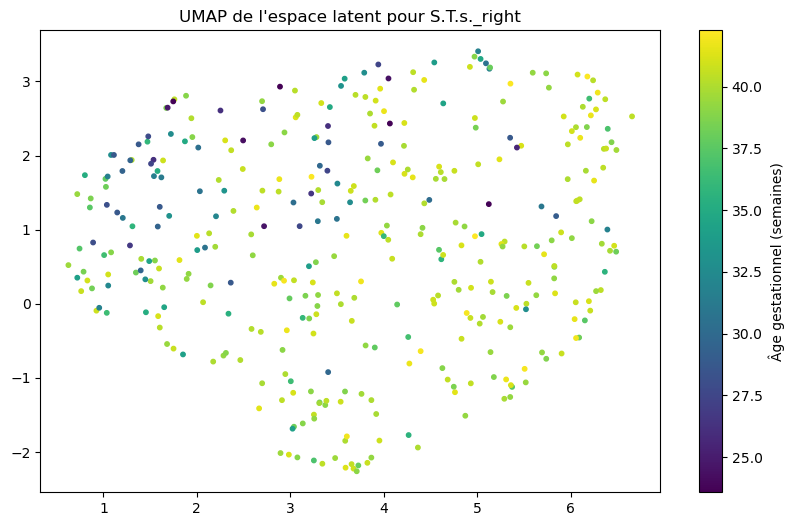

In [4]:
# Visualisation
plt.figure(figsize=(10, 6))
plt.scatter(umap_1[:, 0], umap_1[:, 1], c=embeddings_STS_dHCP['birth_age'], cmap='viridis', s=10)
plt.colorbar(label='Âge gestationnel (semaines)')
plt.title("UMAP de l'espace latent pour S.T.s._right")
plt.show()

### Embeddings STS pour ABCD pour un latent de taille 32

In [6]:
base_path_ABCD="/neurospin/dico/data/deep_folding/current/models/Champollion_V1_after_ablation/embeddings/ABCD_embeddings/"
region="STs_right"
labels_ABCD_path = "/neurospin/dico/rmenasria/Runs/03_main/Input/ABCD/prematurity_labels_true_classes.csv"
labels_ABCD_df = pd.read_csv(labels_ABCD_path, low_memory=False)
labels_ABCD_df['src_subject_id'] = labels_ABCD_df['src_subject_id'].str.replace("_","")
embedding_file = None
for file in os.listdir(base_path_ABCD):
    if file.startswith(region) and file.endswith(".csv"):
        embedding_file = file
        break
    
if embedding_file is None:
    raise FileNotFoundError(f"No embedding file found for region: {region}")
    
emb_path = os.path.join(base_path_ABCD, embedding_file)
emb_df = pd.read_csv(emb_path)
emb_df['ID_clean'] = (
    emb_df['ID'].astype(str)
    .str.replace(r"^sub-", "", regex=True)
    .str.replace("_", "", regex=False)
)

df_ABCD = emb_df.merge(
        labels_ABCD_df,
        left_on='ID_clean', right_on='src_subject_id', how='inner'
    )

#df_ABCD ["gest_age"] = df_ABCD["gest_age"] + 3
df_ABCD = df_ABCD[df_ABCD['gest_age']>=28]

X_STS_ABCD = df_ABCD.filter(regex=r'^dim').columns


Xs_STS_ABCD = StandardScaler().fit_transform(df_ABCD[X_STS_ABCD].values)

umap_2 = umap.UMAP(n_components=2, random_state=42).fit_transform(Xs_STS_ABCD)

/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


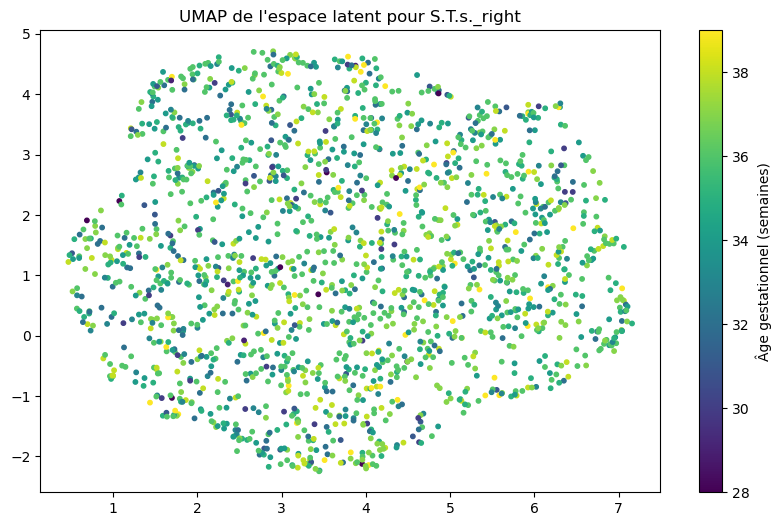

In [8]:
# Visualisation
plt.figure(figsize=(10, 6))
plt.scatter(umap_2[:, 0], umap_2[:, 1], c=df_ABCD['gest_age'], cmap='viridis', s=10)
plt.colorbar(label='Âge gestationnel (semaines)')
plt.title("UMAP de l'espace latent pour S.T.s._right")
plt.show()

### Embeddings STS pour UKB pour un latent de taille 32

In [9]:
# Charger l'espace latent
embeddings_STS_UKB = pd.read_csv('/neurospin/dico/data/deep_folding/current/models/Champollion_V1_after_ablation/STs_right/name08-32-58_52/ukb40_random_embeddings/full_embeddings.csv', index_col=0)

print("Shape embeddings",embeddings_STS_UKB.shape)



Shape embeddings (42433, 32)


In [10]:
# Deuxième UMAP
X_adults= embeddings_STS_UKB.iloc[:, :32].values
global_scaler = StandardScaler()
Xs_adults = global_scaler.fit_transform(X_adults)
umap_3 = umap.UMAP(n_components=2, random_state=42).fit_transform(Xs_adults)

/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


/tmp/ipykernel_1476853/2346860268.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(umap_3[:, 0], umap_3[:, 1], cmap='viridis', s=10)


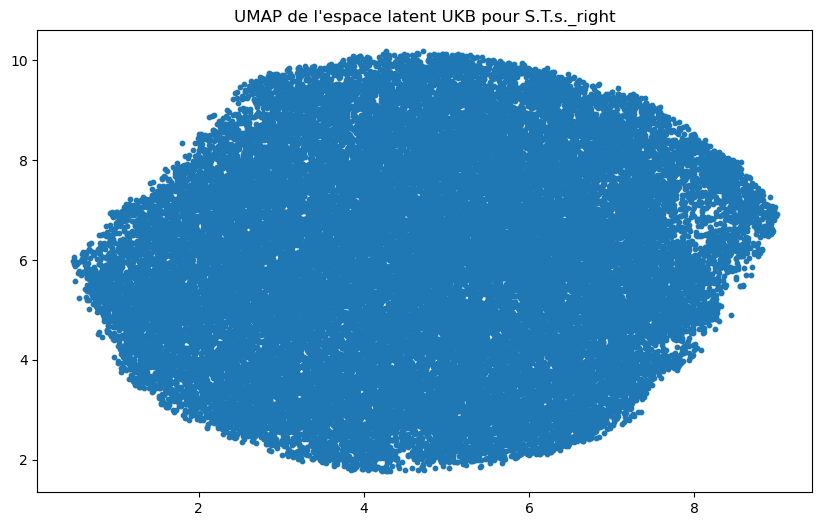

In [11]:
# Visualisation
plt.figure(figsize=(10, 6))
plt.scatter(umap_3[:, 0], umap_3[:, 1], cmap='viridis', s=10)
plt.title("UMAP de l'espace latent UKB pour S.T.s._right")
plt.show()

In [13]:
print("embeddings_STS_dHCP shape :", embeddings_STS_dHCP.shape)
print("labels_dHCP shape         :", labels_dHCP.shape)

embeddings_STS_dHCP shape : (374, 39)
labels_dHCP shape         : (374, 8)


### Projection des bébés et des enfants dans l'espace latent des adultes

In [14]:
# Entraîner UMAP sur les adultes
umap_4 = umap.UMAP(n_components=2, random_state=42)
global_scaler = StandardScaler()

X_adults= embeddings_STS_UKB.iloc[:, :32].values
Xs_adults = global_scaler.fit_transform(X_adults)

adult_2d = umap_4.fit_transform(Xs_adults)

X_babies= embeddings_STS_dHCP.iloc[:,:32].values
Xs_babies = global_scaler.transform(X_babies)

# Projeter les bébés dans cet espace
baby_2d = umap_4.transform(Xs_babies)


Xs_STS_ABCD = global_scaler.transform(df_ABCD[X_STS_ABCD].values)

children_2d = umap_4.transform(Xs_STS_ABCD)







/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warn

In [15]:
print("Shape adults", adult_2d.shape)
print("Shape babies", baby_2d.shape)
print("Shape children", children_2d.shape)

Shape adults (42433, 2)
Shape babies (374, 2)
Shape children (1780, 2)


/tmp/ipykernel_1476853/2880720875.py:20: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(adult_2d[:, 0], adult_2d[:, 1], cmap='grey', s=10, alpha=0.03)


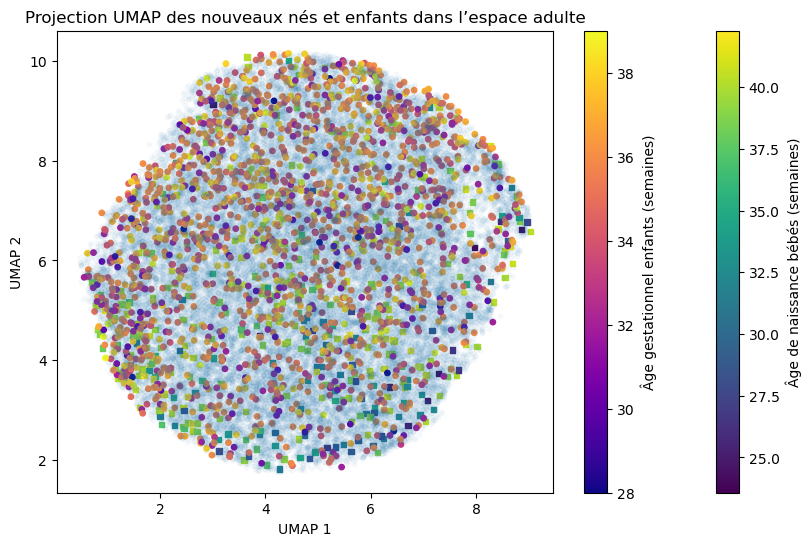

In [16]:
# Afficher les points colorés selon birth_age
plt.figure(figsize=(10, 6))
scatter_1 = plt.scatter(
    baby_2d[:, 0],
    baby_2d[:, 1],
    c=labels_dHCP['birth_age'],
    cmap='viridis',
    s=15,
    marker="s"
)

scatter_2 = plt.scatter(
    children_2d[:, 0],
    children_2d[:, 1],
    c=df_ABCD['gest_age'],
    cmap='plasma',
    s=15,marker="o"
)

plt.scatter(adult_2d[:, 0], adult_2d[:, 1], cmap='grey', s=10, alpha=0.03)
plt.colorbar(scatter_1, label='Âge de naissance bébés (semaines)')
plt.colorbar(scatter_2, label='Âge gestationnel enfants (semaines)')
plt.title('Projection UMAP des nouveaux nés et enfants dans l’espace adulte')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()

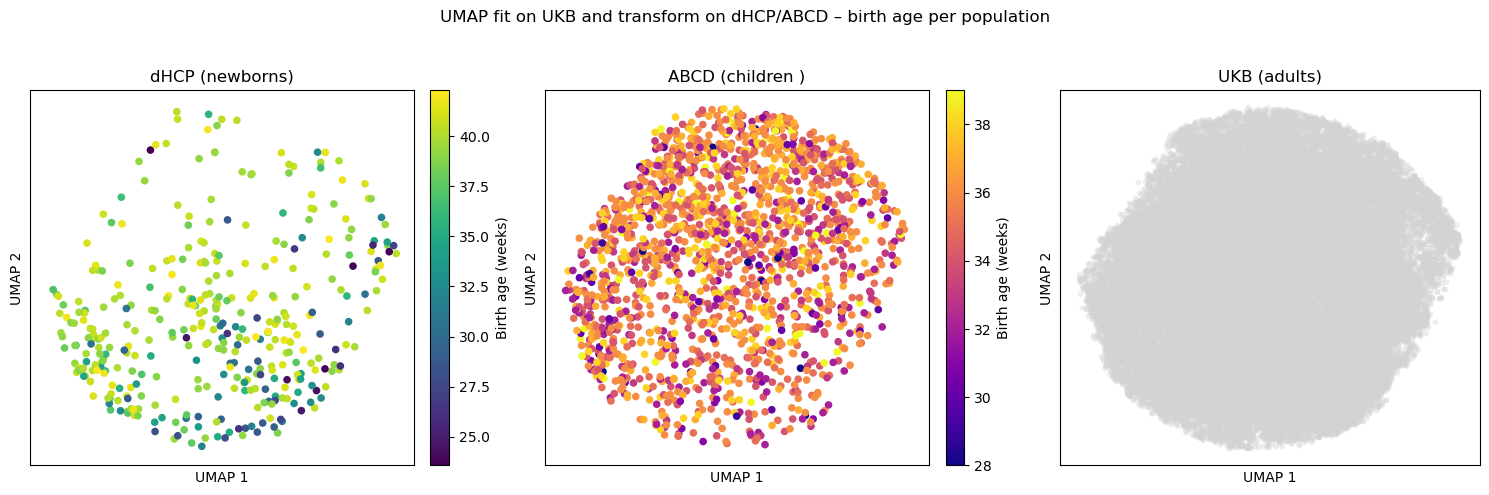

In [17]:
import matplotlib as mpl

# Deg des prématurés
fig, axes = plt.subplots(1, 3, figsize=(15,5), sharex=True, sharey=True)

# Bébé
cmap0 = plt.cm.viridis
norm0 = mpl.colors.Normalize(vmin=labels_dHCP['birth_age'].min(),
                             vmax=labels_dHCP['birth_age'].max())
sc0 = axes[0].scatter(baby_2d[:,0], baby_2d[:,1],
                      c=labels_dHCP['birth_age'], cmap=cmap0, norm=norm0, s=20)
axes[0].set_title("dHCP (newborns)")
axes[0].set_xlabel("UMAP 1")
cbar0 = fig.colorbar(sc0, ax=axes[0], fraction=0.046, pad=0.04)
cbar0.set_label("Birth age (weeks)")

# Enfant
cmap1 = plt.cm.plasma
norm1 = mpl.colors.Normalize(vmin=df_ABCD['gest_age'].min(),
                             vmax=df_ABCD['gest_age'].max())
sc1 = axes[1].scatter(children_2d[:,0], children_2d[:,1],
                      c=df_ABCD['gest_age'], cmap=cmap1, norm=norm1, s=20)
axes[1].set_title("ABCD (children )")
axes[1].set_xlabel("UMAP 1")
cbar1 = fig.colorbar(sc1, ax=axes[1], fraction=0.046, pad=0.04)
cbar1.set_label("Birth age (weeks)")

# Adulte
axes[2].scatter(adult_2d[:,0], adult_2d[:,1],
                color='lightgrey', s=10, alpha=0.3)
axes[2].set_title("UKB (adults)")
axes[2].set_xlabel("UMAP 1")

for ax in axes:
    ax.set_ylabel("UMAP 2")
    ax.set_xticks([]); ax.set_yticks([])

plt.suptitle("UMAP fit on UKB and transform on dHCP/ABCD – birth age per population")
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()


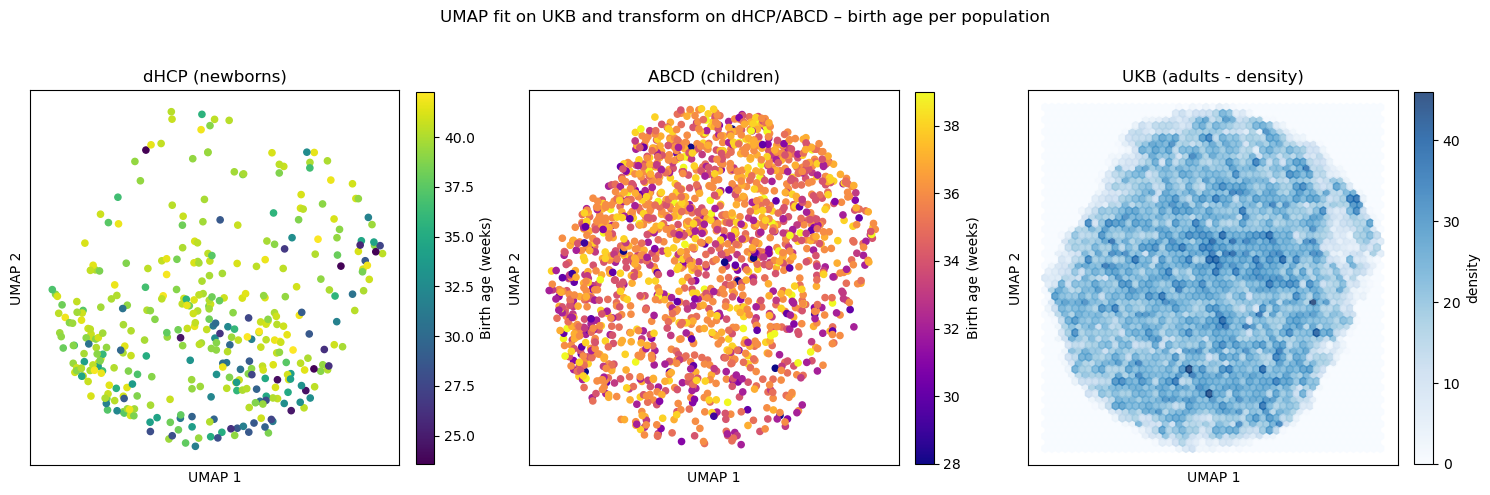

In [18]:
import matplotlib as mpl

# Deg des prématurés
fig, axes = plt.subplots(1, 3, figsize=(15,5), sharex=True, sharey=True)

# Bébé
cmap0 = plt.cm.viridis
norm0 = mpl.colors.Normalize(vmin=labels_dHCP['birth_age'].min(),
                             vmax=labels_dHCP['birth_age'].max())
sc0 = axes[0].scatter(baby_2d[:,0], baby_2d[:,1],
                      c=labels_dHCP['birth_age'], cmap=cmap0, norm=norm0, s=20)
axes[0].set_title("dHCP (newborns)")
axes[0].set_xlabel("UMAP 1")
cbar0 = fig.colorbar(sc0, ax=axes[0], fraction=0.046, pad=0.04)
cbar0.set_label("Birth age (weeks)")

# Enfant
cmap1 = plt.cm.plasma
norm1 = mpl.colors.Normalize(vmin=df_ABCD['gest_age'].min(),
                             vmax=df_ABCD['gest_age'].max())
sc1 = axes[1].scatter(children_2d[:,0], children_2d[:,1],
                      c=df_ABCD['gest_age'], cmap=cmap1, norm=norm1, s=20)
axes[1].set_title("ABCD (children)")
axes[1].set_xlabel("UMAP 1")
cbar1 = fig.colorbar(sc1, ax=axes[1], fraction=0.046, pad=0.04)
cbar1.set_label("Birth age (weeks)")

# Adulte — DENSITÉ
hb = axes[2].hexbin(adult_2d[:,0], adult_2d[:,1],
                    gridsize=50, cmap='Blues', alpha=0.8)
axes[2].set_title("UKB (adults - density)")
axes[2].set_xlabel("UMAP 1")
cbar2 = fig.colorbar(hb, ax=axes[2], fraction=0.046, pad=0.04)
cbar2.set_label("density")

# Style commun
for ax in axes:
    ax.set_ylabel("UMAP 2")
    ax.set_xticks([]); ax.set_yticks([])

plt.suptitle("UMAP fit on UKB and transform on dHCP/ABCD – birth age per population")
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()


### Généralisation à n'importe quelle région

In [65]:
def visualize_embeddings_babies(region="STs_right", latent_size=32):
    labels_dHCP = pd.read_csv('/neurospin/dico/data/deep_folding/current/datasets/dHCP_374_subjects/participants.csv')
    labels_ABCD_path = "/neurospin/dico/rmenasria/Runs/03_main/Input/ABCD/ABCD_preterm_labels_light.csv"
    labels_ABCD_df = pd.read_csv(labels_ABCD_path, low_memory=False)
    labels_ABCD_df['src_subject_id'] = labels_ABCD_df['src_subject_id'].str.replace("_","")

    # Choix du dossier racine en fonction de la taille du latent
    base_path = (
        "/neurospin/dico/data/deep_folding/current/models/Champollion_V1_after_ablation_latent_256"
        if latent_size == 256
        else "/neurospin/dico/data/deep_folding/current/models/Champollion_V1_after_ablation"
    )

    region_path = os.path.join(base_path, region)
    
    # Trouver le nom du dossier unique automatiquement
    subdirs = [d for d in os.listdir(region_path) if os.path.isdir(os.path.join(region_path, d))]
    if len(subdirs) != 1:
        raise RuntimeError(f"Il y a {len(subdirs)} sous-dossiers dans {region_path}, impossible de choisir automatiquement car il y a plusieurs modèles enregistrés par région.")
    model_folder = subdirs[0]

    # Construire les chemins complets
    baby_path = os.path.join(region_path, model_folder, "dHCP_random_embeddings", "full_embeddings.csv")
    adult_path = os.path.join(region_path, model_folder, "ukb40_random_embeddings", "full_embeddings.csv")
    base_path_ABCD="/neurospin/dico/data/deep_folding/current/models/Champollion_V1_after_ablation/embeddings/ABCD_embeddings/"
    region = region
   
    embedding_file = None
    for file in os.listdir(base_path_ABCD):
        if file.startswith(region) and file.endswith(".csv"):
            embedding_file = file
            break
        
    if embedding_file is None:
        raise FileNotFoundError(f"No embedding file found for region: {region}")
        
    emb_path = os.path.join(base_path_ABCD, embedding_file)
    emb_df = pd.read_csv(emb_path)
    emb_df['ID_clean'] = (
        emb_df['ID'].astype(str)
        .str.replace(r"^sub-", "", regex=True)
        .str.replace("_", "", regex=False)
    )

    df_ABCD = emb_df.merge(
            labels_ABCD_df,
            left_on='ID_clean', right_on='src_subject_id', how='inner'
        )

    X_STS_ABCD = df_ABCD.filter(regex=r'^dim').columns

      

    # Charger les embeddings
    baby_embeddings = pd.read_csv(baby_path, index_col=0)
    adult_embeddings = pd.read_csv(adult_path, index_col=0)

    # Filtrer les lignes avec labels
    baby_embeddings = baby_embeddings.loc[baby_embeddings.index.isin(labels_dHCP['Subject'])]
    # Fusionner les labels
    baby_embeddings = baby_embeddings.join(labels_dHCP.set_index('Subject'))


    global_scaler = StandardScaler()
    # Entraîner UMAP sur les adultes
    umap_model = umap.UMAP(n_components=2, random_state=42)
    Xs_adults = global_scaler.fit_transform(adult_embeddings.iloc[:, :latent_size])
    adult_2d = umap_model.fit_transform(Xs_adults)

    # Projeter les bébés dans cet espace
    Xs_babies = global_scaler.transform(baby_embeddings.iloc[:, :latent_size])
    baby_2d = umap_model.transform(Xs_babies)

    Xs_STS_ABCD = global_scaler.transform(df_ABCD[X_STS_ABCD].values)
    children_2d = umap_model.transform(Xs_STS_ABCD)

    # Deg des prématurés
    fig, axes = plt.subplots(1, 3, figsize=(15,5), sharex=True, sharey=True)

    # Bébé
    cmap0 = plt.cm.viridis
    norm0 = mpl.colors.Normalize(vmin=labels_dHCP['birth_age'].min(),
                                vmax=labels_dHCP['birth_age'].max())
    sc0 = axes[0].scatter(baby_2d[:,0], baby_2d[:,1],
                        c=labels_dHCP['birth_age'], cmap=cmap0, norm=norm0, s=20)
    axes[0].set_title("dHCP (newborns)")
    axes[0].set_xlabel("UMAP 1")
    cbar0 = fig.colorbar(sc0, ax=axes[0], fraction=0.046, pad=0.04)
    cbar0.set_label("Birth age (weeks)")

    # Enfant
    cmap1 = plt.cm.plasma
    norm1 = mpl.colors.Normalize(vmin=df_ABCD['gest_age'].min(),
                                vmax=df_ABCD['gest_age'].max())
    sc1 = axes[1].scatter(children_2d[:,0], children_2d[:,1],
                        c=df_ABCD['gest_age'], cmap=cmap1, norm=norm1, s=20)
    axes[1].set_title("ABCD (children)")
    axes[1].set_xlabel("UMAP 1")
    cbar1 = fig.colorbar(sc1, ax=axes[1], fraction=0.046, pad=0.04)
    cbar1.set_label("Birth age (weeks)")

    # Adulte — DENSITÉ
    hb = axes[2].hexbin(adult_2d[:,0], adult_2d[:,1],
                        gridsize=50, cmap='Blues', alpha=0.8)
    axes[2].set_title("UKB (adults - density)")
    axes[2].set_xlabel("UMAP 1")
    cbar2 = fig.colorbar(hb, ax=axes[2], fraction=0.046, pad=0.04)
    cbar2.set_label("density")

    # Style commun
    for ax in axes:
        ax.set_ylabel("UMAP 2")
        ax.set_xticks([]); ax.set_yticks([])

    plt.suptitle("UMAP fit on UKB and transform on dHCP/ABCD – birth age per population")
    plt.tight_layout(rect=[0,0,1,0.95])
    plt.show()


    

/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.

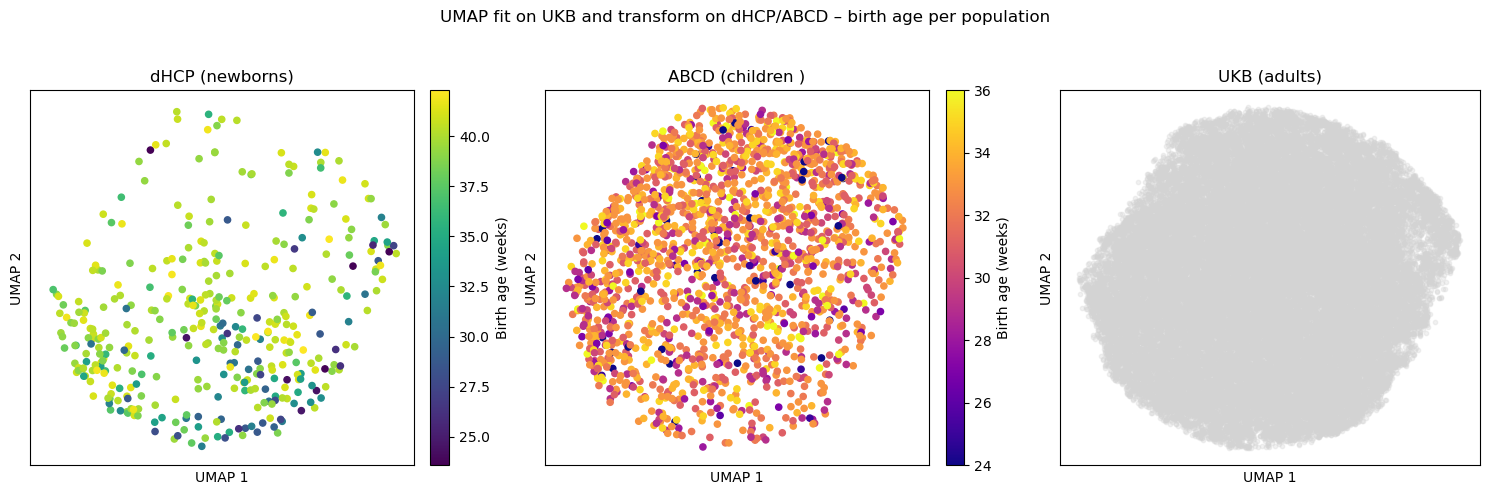

In [66]:
# Vérification de la fonction précédente 

visualize_embeddings_babies(region="STs_right",latent_size=32)

### Enregistrement d'une figure avec toutes les projections

In [67]:
def get_region_list(base_path):
    return sorted([
        d for d in os.listdir(base_path)
        if os.path.isdir(os.path.join(base_path, d))
           and not d.startswith('all_models')
           and not d.startswith('hcp')
           and not d.startswith('ukb')
           and not d.endswith('.csv')
           and not d.endswith('.sh')
           and not d.endswith('embeddings')
    ])




In [70]:
region_list= get_region_list("/neurospin/dico/data/deep_folding/current/models/Champollion_V1_after_ablation")
print("Regions found:", region_list)

region_list.remove("analysis")
region_list.remove("params_OLS")
region_list.remove("region_list")
print("Regions found:", len(region_list))

Regions found: ['CINGULATE_left', 'CINGULATE_right', 'FCLp-subsc-FCLa-INSULA_left', 'FCLp-subsc-FCLa-INSULA_right', 'FCMpost-SpC_left', 'FCMpost-SpC_right', 'FColl-SRh_left', 'FColl-SRh_right', 'FIP_left', 'FIP_right', 'FPO-SCu-ScCal_left', 'FPO-SCu-ScCal_right', 'LARGE_CINGULATE_left', 'LARGE_CINGULATE_right', 'Lobule_parietal_sup_left', 'Lobule_parietal_sup_right', 'OCCIPITAL_left', 'OCCIPITAL_right', 'SC-SPeC_left', 'SC-SPeC_right', 'SC-SPoC_left', 'SC-SPoC_right', 'SC-sylv_left', 'SC-sylv_right', 'SFinf-BROCA-SPeCinf_left', 'SFinf-BROCA-SPeCinf_right', 'SFint-FCMant_left', 'SFint-FCMant_right', 'SFint-SR_left', 'SFint-SR_right', 'SFinter-SFsup_left', 'SFinter-SFsup_right', 'SFmarginal-SFinfant_left', 'SFmarginal-SFinfant_right', 'SFmedian-SFpoltr-SFsup_left', 'SFmedian-SFpoltr-SFsup_right', 'SOr-SOlf_left', 'SOr-SOlf_right', 'SOr_left', 'SOr_right', 'SPeC_left', 'SPeC_right', 'SPoC_left', 'SPoC_right', 'STi-SOTlat_left', 'STi-SOTlat_right', 'STi-STs-STpol_left', 'STi-STs-STpol_righ

In [93]:
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec

def visualize_embeddings_babies_ax(region="STs_right", latent_size=32, ax_baby=None, ax_child=None, ax_adult=None):
    labels_dHCP = pd.read_csv('/neurospin/dico/data/deep_folding/current/datasets/dHCP_374_subjects/participants.csv')
    labels_ABCD_path = "/neurospin/dico/rmenasria/Runs/03_main/Input/ABCD/ABCD_preterm_labels_light.csv"
    labels_ABCD_df = pd.read_csv(labels_ABCD_path, low_memory=False)
    labels_ABCD_df['src_subject_id'] = labels_ABCD_df['src_subject_id'].str.replace("_","")

    base_path = (
        "/neurospin/dico/data/deep_folding/current/models/Champollion_V1_after_ablation_latent_256"
        if latent_size == 256
        else "/neurospin/dico/data/deep_folding/current/models/Champollion_V1_after_ablation"
    )

    region_path = os.path.join(base_path, region)
    subdirs = [d for d in os.listdir(region_path) if os.path.isdir(os.path.join(region_path, d))]
    if len(subdirs) != 1:
        print(f"[AVERTISSEMENT] {region}: {len(subdirs)} sous-dossiers — ignoré.")
        return

    model_folder = subdirs[0]
    baby_path = os.path.join(region_path, model_folder, "dHCP_random_embeddings", "full_embeddings.csv")
    adult_path = os.path.join(region_path, model_folder, "ukb40_random_embeddings", "full_embeddings.csv")


    base_path_ABCD="/neurospin/dico/data/deep_folding/current/models/Champollion_V1_after_ablation/embeddings/ABCD_embeddings/"
   
    embedding_file = None
    for file in os.listdir(base_path_ABCD):
        if file.startswith(region) and file.endswith(".csv"):
            embedding_file = file
            break
        
    if embedding_file is None:
        raise FileNotFoundError(f"No embedding file found for region: {region}")
        
    emb_path = os.path.join(base_path_ABCD, embedding_file)
    emb_df = pd.read_csv(emb_path)
    emb_df['ID_clean'] = (
        emb_df['ID'].astype(str)
        .str.replace(r"^sub-", "", regex=True)
        .str.replace("_", "", regex=False)
    )

    df_ABCD = emb_df.merge(
            labels_ABCD_df,
            left_on='ID_clean', right_on='src_subject_id', how='inner'
        )

    X_STS_ABCD = df_ABCD.filter(regex=r'^dim').columns


    try:
        baby_embeddings = pd.read_csv(baby_path, index_col=0)
        adult_embeddings = pd.read_csv(adult_path, index_col=0)
    except Exception as e:
        print(f"[ERREUR] Chargement échoué pour {region}: {e}")
        return

    baby_embeddings = baby_embeddings.loc[baby_embeddings.index.isin(labels_dHCP['Subject'])]
    baby_embeddings = baby_embeddings.join(labels_dHCP.set_index('Subject'))
    

    # UMAP fit
    scaler = StandardScaler()
    umap_model = umap.UMAP(n_components=2, random_state=42)
    adult_latent = scaler.fit_transform(adult_embeddings.iloc[:, :latent_size])
    adult_2d = umap_model.fit_transform(adult_latent)
    baby_2d = umap_model.transform(scaler.transform(baby_embeddings.iloc[:, :latent_size]))
    children_2d = umap_model.transform(scaler.transform(df_ABCD[X_STS_ABCD].iloc[:, :latent_size]))

    
    # dHCP
    norm0 = mpl.colors.Normalize(vmin=labels_dHCP['birth_age'].min(), vmax=labels_dHCP['birth_age'].max())
    sc0 = ax_baby.scatter(baby_2d[:,0], baby_2d[:,1], c=baby_embeddings['birth_age'], cmap='viridis', norm=norm0, s=10)
    ax_baby.set_title("dHCP",fontsize=10)
    ax_baby.set_aspect('equal', 'box')
    ax_baby.set_xticks([]); ax_baby.set_yticks([])
    cb0 = ax.figure.colorbar(sc0, ax=ax_baby, fraction=0.046, pad=0.04)
    cb0.set_label("Birth age (w)", fontsize=8)


    # Children
    norm1 = mpl.colors.Normalize(vmin=df_ABCD['gest_age'].min(), vmax=df_ABCD['gest_age'].max())
    sc1 = ax_child.scatter(children_2d[:,0], children_2d[:,1], c=df_ABCD['gest_age'], cmap='plasma', norm=norm1, s=10)
    ax_child.set_title("ABCD",fontsize=10)
    ax_child.set_aspect('equal', 'box')
    ax_child.set_xticks([]); ax_child.set_yticks([])
    cb1 = ax.figure.colorbar(sc1, ax=ax_child, fraction=0.046, pad=0.04)
    cb1.set_label("Gestational age (w)", fontsize=8)

    # Adults
    hb = ax_adult.hexbin(adult_2d[:,0], adult_2d[:,1], gridsize=50, cmap='Blues', alpha=0.8)
    ax_adult.set_title("UKB (density)",fontsize=10)
    ax_adult.set_aspect('equal', 'box')
    ax_adult.set_xticks([]); ax_adult.set_yticks([])
    cb2 = ax.figure.colorbar(hb, ax=ax_adult, fraction=0.046, pad=0.04)
    cb2.set_label("Count", fontsize=8)



    return sc0 

In [95]:
# Paramètres
latent_size = 32

# Liste des régions
base_path = (
        "/neurospin/dico/data/deep_folding/current/models/Champollion_V1_after_ablation_latent_256"
        if latent_size == 256
        else "/neurospin/dico/data/deep_folding/current/models/Champollion_V1_after_ablation"
    )
region_list = get_region_list(base_path)
print(region_list)

# Si besoin on peut distinguer par hémisphère
right_regions_list = [region for region in region_list if region.endswith("right")]
left_regions_list = [region for region in region_list if region.endswith("left")]

print(len(right_regions_list))
print(len(left_regions_list))
#region_list_test=["STs_right","STs_left"]

n_regions=len(right_regions_list)

fig = plt.figure(figsize=(12, 4 * n_regions))
gs = GridSpec(n_regions, 3, figure=fig, wspace=0.3, hspace=0.4)

scatter = None
for i, region in enumerate(left_regions_list):
    print(f"Région : {region}")
    try:
        ax_baby   = fig.add_subplot(gs[i, 0])
        ax_child  = fig.add_subplot(gs[i, 1])
        ax_adult  = fig.add_subplot(gs[i, 2])
        ax_baby.set_ylabel(region, fontsize=12, fontweight='bold')
        visualize_embeddings_babies_ax(region=region, latent_size=32,
                                       ax_baby=ax_baby, ax_child=ax_child, ax_adult=ax_adult)
    except Exception as e:
        print(f"[ERREUR] pour {region}: {e}")
        continue

fig.suptitle(f"UMAP par région – latent={latent_size}", fontsize=16)
fig.savefig(f"umap_grid_left_latents{latent_size}.png", dpi=300,bbox_inches='tight')
plt.close(fig)


['CINGULATE_left', 'CINGULATE_right', 'FCLp-subsc-FCLa-INSULA_left', 'FCLp-subsc-FCLa-INSULA_right', 'FCMpost-SpC_left', 'FCMpost-SpC_right', 'FColl-SRh_left', 'FColl-SRh_right', 'FIP_left', 'FIP_right', 'FPO-SCu-ScCal_left', 'FPO-SCu-ScCal_right', 'LARGE_CINGULATE_left', 'LARGE_CINGULATE_right', 'Lobule_parietal_sup_left', 'Lobule_parietal_sup_right', 'OCCIPITAL_left', 'OCCIPITAL_right', 'SC-SPeC_left', 'SC-SPeC_right', 'SC-SPoC_left', 'SC-SPoC_right', 'SC-sylv_left', 'SC-sylv_right', 'SFinf-BROCA-SPeCinf_left', 'SFinf-BROCA-SPeCinf_right', 'SFint-FCMant_left', 'SFint-FCMant_right', 'SFint-SR_left', 'SFint-SR_right', 'SFinter-SFsup_left', 'SFinter-SFsup_right', 'SFmarginal-SFinfant_left', 'SFmarginal-SFinfant_right', 'SFmedian-SFpoltr-SFsup_left', 'SFmedian-SFpoltr-SFsup_right', 'SOr-SOlf_left', 'SOr-SOlf_right', 'SOr_left', 'SOr_right', 'SPeC_left', 'SPeC_right', 'SPoC_left', 'SPoC_right', 'STi-SOTlat_left', 'STi-SOTlat_right', 'STi-STs-STpol_left', 'STi-STs-STpol_right', 'STs_left',

/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warn

Région : FCLp-subsc-FCLa-INSULA_left


/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warn

Région : FCMpost-SpC_left


/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warn

Région : FColl-SRh_left


/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warn

Région : FIP_left


/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warn

Région : FPO-SCu-ScCal_left


/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warn

Région : LARGE_CINGULATE_left


/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warn

Région : Lobule_parietal_sup_left


/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warn

Région : OCCIPITAL_left


/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warn

Région : SC-SPeC_left


/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warn

Région : SC-SPoC_left


/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warn

Région : SC-sylv_left


/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warn

Région : SFinf-BROCA-SPeCinf_left


/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warn

Région : SFint-FCMant_left


/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warn

Région : SFint-SR_left


/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warn

Région : SFinter-SFsup_left


/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warn

Région : SFmarginal-SFinfant_left


/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warn

Région : SFmedian-SFpoltr-SFsup_left


/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warn

Région : SOr-SOlf_left


/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warn

Région : SOr_left


/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warn

Région : SPeC_left


/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warn

Région : SPoC_left


/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warn

Région : STi-SOTlat_left


/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warn

Région : STi-STs-STpol_left


/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warn

Région : STs_left


/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warn

Région : STsbr_left


/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warn

Région : ScCal-SLi_left


/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warn

Région : SsP-SPaint_left


/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warn

Région : fronto-parietal_medial_face_left


/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warn